raulvalerio@gmail.com

# Learn how to use DataFrames with Pandas and...

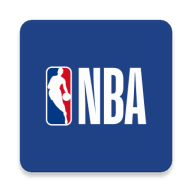

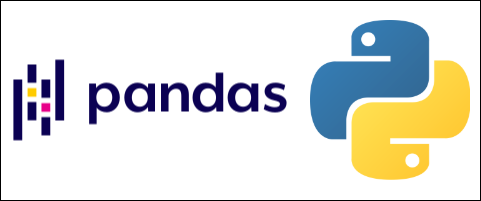

* pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

### Loading libraries to utilize

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading csv file from other path

In [85]:
nba_dataset = pd.read_csv("D:/DOCUMENTOS RAUL/Canal Yout/Curso Python/nba.csv",sep=',') #header=None ,na_values='6-5'
nba_dataset.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [86]:
nba_dataset.head(n=7)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90.0,PF,29.0,6-9,240.0,NaN,12000000.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960.0


### Know your data

In [3]:
nba_dataset.shape

(458, 9)

In [4]:
nba_dataset.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height       object
Weight      float64
College      object
Salary      float64
dtype: object

In [87]:
nba_dataset.isnull()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
453,False,False,False,False,False,False,False,False,False
454,False,False,False,False,False,False,False,True,False
455,False,False,False,False,False,False,False,True,False
456,False,False,False,False,False,False,False,False,False


In [88]:
##  Any null values in data?   inspecting by factor/feature
nba_dataset.isnull().sum(axis = 0)

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [6]:
## if we want to drop incomplete cases
#nba_dataset = nba_dataset.dropna()

In [47]:
nba_dataset[ nba_dataset.Name.isnull()]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Height_ft,Height_m,BMI
457,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
nba_dataset[ nba_dataset.Name.notna() ]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0


In [90]:
nba_dataset = nba_dataset[ nba_dataset.Name.notna() ]

### Numerical Values

In [91]:
nba_dataset.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [92]:
nba_dataset[['Age','Weight', 'Salary']].describe()

## we could use
#  nba_dataset.drop(['Number'], axis=1).describe()

,Age,Weight,Salary
count,457.000000,457.000000,4.460000e+02
mean,26.938731,221.522976,4.842684e+06
std,4.404016,26.368343,5.229238e+06
min,19.000000,161.000000,3.088800e+04
25%,24.000000,200.000000,1.044792e+06
50%,26.000000,220.000000,2.839073e+06
75%,30.000000,240.000000,6.500000e+06
max,40.000000,307.000000,2.500000e+07


In [93]:
( nba_dataset[ 'Salary'] / 1e+06).describe()  ## 1000000

count    446.000000
mean       4.842684
std        5.229238
min        0.030888
25%        1.044792
50%        2.839073
75%        6.500000
max       25.000000
Name: Salary, dtype: float64

In [10]:
nba_dataset[['Age','Weight', 'Salary']].corr()

,Age,Weight,Salary
Age,1.000000,0.087183,0.213459
Weight,0.087183,1.000000,0.138321
Salary,0.213459,0.138321,1.000000


*  Change format

In [94]:
nba_dataset.Number = nba_dataset.Number.astype('Int64')

### Categorical variables

In [95]:
pd.crosstab( nba_dataset['Position'], columns='count', colnames=['Player'] ) #rownames=['a']

Player,count
Position,
C,78
PF,100
PG,92
SF,85
SG,102


* Alternatively...

In [96]:
nba_dataset.Position.value_counts()

SG    102
PF    100
PG     92
SF     85
C      78
Name: Position, dtype: int64

In [14]:
pd.crosstab(nba_dataset['Team'], columns='count')

col_0,count
Team,
Atlanta Hawks,15
Boston Celtics,15
Brooklyn Nets,15
Charlotte Hornets,15
Chicago Bulls,15
Cleveland Cavaliers,15
Dallas Mavericks,15
Denver Nuggets,15
Detroit Pistons,15


In [97]:
pd.crosstab(nba_dataset['College'], columns='count').sort_values( by="count", ascending=False)  # sort_index(axis=1)

col_0,count
College,
Kentucky,22
Duke,20
Kansas,18
North Carolina,16
UCLA,15
...,...
Kansas State,1
Iowa State,1
Iowa,1


*  Most repeted Jersey number??

In [98]:
pd.crosstab(nba_dataset['Number'], columns='count').sort_values( by="count", ascending=False)

col_0,count
Number,
5,23
3,21
0,20
1,20
8,19
11,17
4,17
12,17
2,16


## Feature engineering

### Split column Height and convert it to feet

In [17]:
nba_dataset.Height.str.split("-",expand=True)

,0,1
0,6,2
1,6,6
2,6,5
3,6,5
4,6,10
...,...,...
453,6,3
454,6,1
455,7,3
456,7,0


In [99]:
H_feet = nba_dataset.Height.str.split("-",expand=True)[0]
H_inch = nba_dataset.Height.str.split("-",expand=True)[1]

# nba_dataset['Height_ft'] = H_feet.astype('Int64') + H_inch.astype('Int64')

nba_dataset['Height_ft'] = pd.to_numeric(H_feet, errors='coerce') + pd.to_numeric(H_inch, errors='coerce')*0.083
## error with nba_dataset.Height_ft

In [100]:
nba_dataset.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Height_ft
0,Avery Bradley,Boston Celtics,0,PG,25.0,6-2,180.0,Texas,7730337.0,6.166
1,Jae Crowder,Boston Celtics,99,SF,25.0,6-6,235.0,Marquette,6796117.0,6.498
2,John Holland,Boston Celtics,30,SG,27.0,6-5,205.0,Boston University,NaN,6.415
3,R.J. Hunter,Boston Celtics,28,SG,22.0,6-5,185.0,Georgia State,1148640.0,6.415
4,Jonas Jerebko,Boston Celtics,8,PF,29.0,6-10,231.0,NaN,5000000.0,6.830


#### Height in m

In [101]:
nba_dataset['Height_m'] = nba_dataset['Height_ft'] / 3.28

In [102]:
nba_dataset.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Height_ft,Height_m
0,Avery Bradley,Boston Celtics,0,PG,25.0,6-2,180.0,Texas,7730337.0,6.166,1.879878
1,Jae Crowder,Boston Celtics,99,SF,25.0,6-6,235.0,Marquette,6796117.0,6.498,1.981098
2,John Holland,Boston Celtics,30,SG,27.0,6-5,205.0,Boston University,NaN,6.415,1.955793
3,R.J. Hunter,Boston Celtics,28,SG,22.0,6-5,185.0,Georgia State,1148640.0,6.415,1.955793
4,Jonas Jerebko,Boston Celtics,8,PF,29.0,6-10,231.0,NaN,5000000.0,6.830,2.082317


In [103]:
nba_dataset.Height_m.describe()

count    457.000000
mean       2.011319
std        0.087058
min        1.752134
25%        1.955793
50%        2.031707
75%        2.082317
max        2.210061
Name: Height_m, dtype: float64

#### BMI

Body Mass Index =  Weight in Kg / ( Height in m ) ^2

In [104]:
nba_dataset['BMI'] = ( nba_dataset.Weight / 2.2) / ( nba_dataset.Height_m )**2    #nba_dataset.Height_ft/3.28

In [105]:
nba_dataset.BMI.describe()

count    457.000000
mean      24.816361
std        1.668576
min       19.980968
25%       23.711581
50%       24.840704
75%       25.969827
max       31.414508
Name: BMI, dtype: float64

## Group by

#### By team

In [25]:
nba_dataset.groupby(['Team'])['Salary'].mean()

Team
Atlanta Hawks             4.860197e+06
Boston Celtics            4.181505e+06
Brooklyn Nets             3.501898e+06
Charlotte Hornets         5.222728e+06
Chicago Bulls             5.785559e+06
Cleveland Cavaliers       7.642049e+06
Dallas Mavericks          4.746582e+06
Denver Nuggets            4.294424e+06
Detroit Pistons           4.477884e+06
Golden State Warriors     5.924600e+06
Houston Rockets           5.018868e+06
Indiana Pacers            4.450122e+06
Los Angeles Clippers      6.323643e+06
Los Angeles Lakers        4.784695e+06
Memphis Grizzlies         5.467920e+06
Miami Heat                6.347359e+06
Milwaukee Bucks           4.350220e+06
Minnesota Timberwolves    4.593054e+06
New Orleans Pelicans      4.355304e+06
New York Knicks           4.581494e+06
Oklahoma City Thunder     6.251020e+06
Orlando Magic             4.297248e+06
Philadelphia 76ers        2.213778e+06
Phoenix Suns              4.229676e+06
Portland Trail Blazers    3.220121e+06
Sacramento Kings    

In [106]:
nba_dataset.groupby(['Team'])['Height_m'].mean()

Team
Atlanta Hawks             2.013232
Boston Celtics            1.987927
Brooklyn Nets             1.996280
Charlotte Hornets         2.010020
Chicago Bulls             2.025041
Cleveland Cavaliers       2.009858
Dallas Mavericks          2.026890
Denver Nuggets            2.009858
Detroit Pistons           2.001341
Golden State Warriors     2.018293
Houston Rockets           2.018293
Indiana Pacers            2.001260
Los Angeles Clippers      1.996280
Los Angeles Lakers        2.020061
Memphis Grizzlies         1.989600
Miami Heat                2.013232
Milwaukee Bucks           2.019055
Minnesota Timberwolves    2.042639
New Orleans Pelicans      2.002535
New York Knicks           2.022370
Oklahoma City Thunder     2.019980
Orlando Magic             2.004856
Philadelphia 76ers        2.014919
Phoenix Suns              1.987927
Portland Trail Blazers    2.018374
Sacramento Kings          2.004878
San Antonio Spurs         2.014919
Toronto Raptors           2.021748
Utah Jazz      

In [107]:
nba_dataset.groupby(['Team'])['BMI'].mean()

Team
Atlanta Hawks             24.727356
Boston Celtics            25.194902
Brooklyn Nets             24.556973
Charlotte Hornets         24.714737
Chicago Bulls             24.162307
Cleveland Cavaliers       25.549536
Dallas Mavericks          25.071027
Denver Nuggets            24.426572
Detroit Pistons           25.118470
Golden State Warriors     24.948722
Houston Rockets           24.551651
Indiana Pacers            25.151245
Los Angeles Clippers      24.943879
Los Angeles Lakers        25.191614
Memphis Grizzlies         24.912695
Miami Heat                24.414555
Milwaukee Bucks           24.933502
Minnesota Timberwolves    24.830012
New Orleans Pelicans      24.969249
New York Knicks           24.815059
Oklahoma City Thunder     25.494820
Orlando Magic             23.995627
Philadelphia 76ers        24.825557
Phoenix Suns              25.073720
Portland Trail Blazers    24.323396
Sacramento Kings          24.926264
San Antonio Spurs         24.966199
Toronto Raptors        

#### Analysis by Position

In [28]:
nba_dataset.groupby(['Position'])['Salary'].mean()

Position
C     5.967052e+06
PF    4.562483e+06
PG    5.077829e+06
SF    4.857393e+06
SG    4.009861e+06
Name: Salary, dtype: float64

In [108]:
nba_dataset.groupby(['Position'])['Height_m'].mean()

Position
C     2.115631
PF    2.075052
PG    1.890827
SF    2.021288
SG    1.969437
Name: Height_m, dtype: float64

In [109]:
nba_dataset.groupby(['Position'])['Weight'].mean()

Position
C     254.205128
PF    240.430000
PG    189.478261
SF    221.776471
SG    206.686275
Name: Weight, dtype: float64

In [110]:
nba_dataset.groupby(['Position'])['BMI'].mean()

Position
C     25.830921
PF    25.397849
PG    24.099864
SF    24.684315
SG    24.226724
Name: BMI, dtype: float64

#### Using lambda function

In [120]:
nba_dataset.groupby('College').filter( lambda x: len(x) >10 ).College.value_counts()

Kentucky          22
Duke              20
Kansas            18
North Carolina    16
UCLA              15
Arizona           13
Name: College, dtype: int64

In [115]:
nba_dataset.groupby('College').filter( lambda x: len(x) >10 ).College

13           Kentucky
14     North Carolina
17     North Carolina
18            Arizona
26             Kansas
            ...      
433              Duke
439              Duke
449              Duke
452          Kentucky
456            Kansas
Name: College, Length: 104, dtype: object

### Double group by

In [121]:
nba_dataset.groupby(['Team','Position'])['Salary'].mean()

Team                Position
Atlanta Hawks       C           7.585417e+06
                    PF          5.988067e+06
                    PG          4.881700e+06
                    SF          3.000000e+06
                    SG          2.607758e+06
                                    ...     
Washington Wizards  C           8.163476e+06
                    PF          5.650000e+06
                    PG          9.011208e+06
                    SF          2.789700e+06
                    SG          2.839248e+06
Name: Salary, Length: 149, dtype: float64

### Accesing to rows and columns

##### Conditions and filter 

* Are there Players older than 40??

In [126]:
nba_dataset.Age >40

0      False
1      False
2      False
3      False
4      False
       ...  
452    False
453    False
454    False
455    False
456    False
Name: Age, Length: 457, dtype: bool

In [125]:
(nba_dataset.Age >=40).sum()

3

* Players younger than 20? teenegers??

In [133]:
nba_dataset[ nba_dataset.Age < 20 ]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Height_ft,Height_m,BMI
122,Devin Booker,Phoenix Suns,1,SG,19.0,6-6,206.0,Kentucky,2127840.0,6.498,1.981098,23.857933
226,Rashad Vaughn,Milwaukee Bucks,20,SG,19.0,6-6,202.0,UNLV,1733040.0,6.498,1.981098,23.394672


In [128]:
nba_dataset.index[ nba_dataset.Age < 20]

Int64Index([122, 226], dtype='int64')

In [129]:
nba_dataset.Name.iloc[122]  ## nba_dataset.Name.loc[122]

'Devin Booker'

In [130]:
nba_dataset.Name.iloc[226]

'Rashad Vaughn'

* Are there overweighted players?

In [134]:
nba_dataset[ nba_dataset.BMI>28 ]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Height_ft,Height_m,BMI
41,Kevin Seraphin,New York Knicks,1,C,26.0,6-10,278.0,NaN,2814000.0,6.830,2.082317,29.142607
56,Jahlil Okafor,Philadelphia 76ers,8,C,20.0,6-11,275.0,Duke,4582680.0,6.913,2.107622,28.140032
119,Metta World Peace,Los Angeles Lakers,37,SF,36.0,6-7,260.0,St. John's,947276.0,6.581,2.006402,29.357196
133,P.J. Tucker,Phoenix Suns,17,SF,31.0,6-6,245.0,Texas,5500000.0,6.498,1.981098,28.374726
135,Alan Williams,Phoenix Suns,15,C,23.0,6-8,260.0,UC Santa Barbara,83397.0,6.664,2.031707,28.630463
155,Cristiano Felicio,Chicago Bulls,6,PF,23.0,6-10,275.0,NaN,525093.0,6.830,2.082317,28.828118
188,Andre Drummond,Detroit Pistons,0,C,22.0,6-11,279.0,Connecticut,3272091.0,6.913,2.107622,28.549342
237,Zaza Pachulia,Dallas Mavericks,27,C,32.0,6-11,275.0,NaN,5200000.0,6.913,2.107622,28.140032
273,Alex Stepheson,Memphis Grizzlies,35,PF,28.0,6-10,270.0,USC,NaN,6.830,2.082317,28.303971
292,Kendrick Perkins,New Orleans Pelicans,5,C,31.0,6-10,270.0,NaN,947276.0,6.830,2.082317,28.303971


##### double condition

### PG Player taller than 2.0 m?

In [135]:
nba_dataset[ (nba_dataset.Position == "PG") & (nba_dataset.Height_m > 2.0) ]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Height_ft,Height_m,BMI
84,Shaun Livingston,Golden State Warriors,34,PG,30.0,6-7,192.0,NaN,5543725.0,6.581,2.006402,21.67916


### Tallest players???

In [136]:
nba_dataset.Height_m.max()

2.210060975609756

In [137]:
nba_dataset[nba_dataset.Height_m == nba_dataset.Height_m.max()]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Height_ft,Height_m,BMI
40,Kristaps Porzingis,New York Knicks,6,PF,20.0,7-3,240.0,NaN,4131720.0,7.249,2.210061,22.334696
302,Boban Marjanovic,San Antonio Spurs,40,C,27.0,7-3,290.0,NaN,1200000.0,7.249,2.210061,26.987758
322,Walter Tavares,Atlanta Hawks,22,C,24.0,7-3,260.0,NaN,1000000.0,7.249,2.210061,24.195921
455,Tibor Pleiss,Utah Jazz,21,C,26.0,7-3,256.0,NaN,2900000.0,7.249,2.210061,23.823676


### Highest salaries??

In [138]:
nba_dataset[ nba_dataset.Salary == nba_dataset.Salary.max() ]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Height_ft,Height_m,BMI
109,Kobe Bryant,Los Angeles Lakers,24,SF,37.0,6-6,212.0,NaN,25000000.0,6.498,1.981098,24.552824


##### Top 10

In [139]:
nba_dataset.sort_values("Salary", ascending=False).head(10)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Height_ft,Height_m,BMI
109,Kobe Bryant,Los Angeles Lakers,24,SF,37.0,6-6,212.0,NaN,25000000.0,6.498,1.981098,24.552824
169,LeBron James,Cleveland Cavaliers,23,SF,31.0,6-8,250.0,NaN,22970500.0,6.664,2.031707,27.529292
33,Carmelo Anthony,New York Knicks,7,SF,32.0,6-8,240.0,Syracuse,22875000.0,6.664,2.031707,26.428120
251,Dwight Howard,Houston Rockets,12,C,30.0,6-11,265.0,NaN,22359364.0,6.913,2.107622,27.116758
339,Chris Bosh,Miami Heat,1,PF,32.0,6-11,235.0,Georgia Tech,22192730.0,6.913,2.107622,24.046936
100,Chris Paul,Los Angeles Clippers,3,PG,31.0,6-0,175.0,Wake Forest,21468695.0,6.000,1.829268,23.771717
414,Kevin Durant,Oklahoma City Thunder,35,SF,27.0,6-9,240.0,Texas,20158622.0,6.747,2.057012,25.781895
164,Derrick Rose,Chicago Bulls,1,PG,27.0,6-3,190.0,Memphis,20093064.0,6.249,1.905183,23.793458
349,Dwyane Wade,Miami Heat,3,SG,34.0,6-4,220.0,Marquette,20000000.0,6.332,1.930488,26.832793
294,LaMarcus Aldridge,San Antonio Spurs,12,PF,30.0,6-11,240.0,Texas,19689000.0,6.913,2.107622,24.558573


### Data imputation

In [140]:
nba_dataset[ nba_dataset.Salary.isnull()]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Height_ft,Height_m,BMI
2,John Holland,Boston Celtics,30,SG,27.0,6-5,205.0,Boston University,NaN,6.415,1.955793,24.360463
46,Elton Brand,Philadelphia 76ers,42,PF,37.0,6-9,254.0,Duke,NaN,6.747,2.057012,27.285838
171,Dahntay Jones,Cleveland Cavaliers,30,SG,35.0,6-6,225.0,Duke,NaN,6.498,1.981098,26.058422
264,Jordan Farmar,Memphis Grizzlies,4,PG,29.0,6-2,180.0,UCLA,NaN,6.166,1.879878,23.152104
269,Ray McCallum,Memphis Grizzlies,5,PG,24.0,6-3,190.0,Detroit,NaN,6.249,1.905183,23.793458
270,Xavier Munford,Memphis Grizzlies,14,PG,24.0,6-3,180.0,Rhode Island,NaN,6.249,1.905183,22.541170
273,Alex Stepheson,Memphis Grizzlies,35,PF,28.0,6-10,270.0,USC,NaN,6.830,2.082317,28.303971
350,Briante Weber,Miami Heat,12,PG,23.0,6-2,165.0,Virginia Commonwealth,NaN,6.166,1.879878,21.222762
353,Dorell Wright,Miami Heat,11,SF,30.0,6-9,205.0,NaN,NaN,6.747,2.057012,22.022035
397,Axel Toupane,Denver Nuggets,6,SG,23.0,6-7,210.0,NaN,NaN,6.581,2.006402,23.711581


In [141]:
n = nba_dataset[ nba_dataset.Salary.isnull()].index
n

Int64Index([2, 46, 171, 264, 269, 270, 273, 350, 353, 397, 409], dtype='int64')

In [142]:
nba_dataset.Salary = nba_dataset.groupby(["Position"]).Salary.apply( lambda x: x.fillna( x.mean()) )

In [143]:
nba_dataset.iloc[n]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Height_ft,Height_m,BMI
2,John Holland,Boston Celtics,30,SG,27.0,6-5,205.0,Boston University,4.009861e+06,6.415,1.955793,24.360463
46,Elton Brand,Philadelphia 76ers,42,PF,37.0,6-9,254.0,Duke,4.562483e+06,6.747,2.057012,27.285838
171,Dahntay Jones,Cleveland Cavaliers,30,SG,35.0,6-6,225.0,Duke,4.009861e+06,6.498,1.981098,26.058422
264,Jordan Farmar,Memphis Grizzlies,4,PG,29.0,6-2,180.0,UCLA,5.077829e+06,6.166,1.879878,23.152104
269,Ray McCallum,Memphis Grizzlies,5,PG,24.0,6-3,190.0,Detroit,5.077829e+06,6.249,1.905183,23.793458
270,Xavier Munford,Memphis Grizzlies,14,PG,24.0,6-3,180.0,Rhode Island,5.077829e+06,6.249,1.905183,22.541170
273,Alex Stepheson,Memphis Grizzlies,35,PF,28.0,6-10,270.0,USC,4.562483e+06,6.830,2.082317,28.303971
350,Briante Weber,Miami Heat,12,PG,23.0,6-2,165.0,Virginia Commonwealth,5.077829e+06,6.166,1.879878,21.222762
353,Dorell Wright,Miami Heat,11,SF,30.0,6-9,205.0,NaN,4.857393e+06,6.747,2.057012,22.022035
397,Axel Toupane,Denver Nuggets,6,SG,23.0,6-7,210.0,NaN,4.009861e+06,6.581,2.006402,23.711581


### Create categorical variables

##### Teenager, experienced or veteran??

In [79]:
nba_dataset['Experience'] = pd.cut(nba_dataset.Age, bins=[0, 21, 35, float('Inf')], labels=['Teenager', 'Experienced', 'Veteran'])

In [80]:
nba_dataset[['Experience', 'Age'] ]

,Experience,Age
0,Experienced,25.0
1,Experienced,25.0
2,Experienced,27.0
3,Experienced,22.0
4,Experienced,29.0
...,...,...
452,Teenager,20.0
453,Experienced,26.0
454,Experienced,24.0
455,Experienced,26.0


In [83]:
 nba_dataset.Experience.value_counts()

Experienced    394
Teenager        40
Veteran         23
Name: Age, dtype: int64

### Create dummy variables

### Data visualization with Pandas

<AxesSubplot:title={'center':'Height_m'}, xlabel='[Position]'>

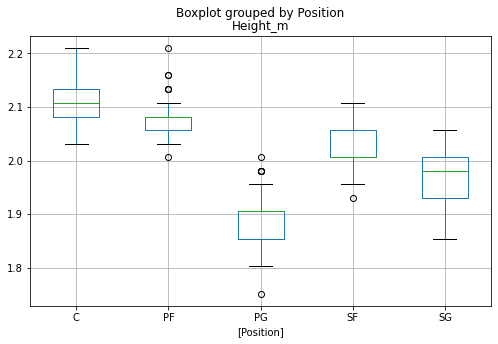

In [51]:
nba_dataset.boxplot(column=['Height_m'], by=['Position'], figsize=(8,5) ) # order=?

### Data visualization with Matplotlib

### Data visualization with Seaborn

<AxesSubplot:xlabel='Age', ylabel='Salary'>

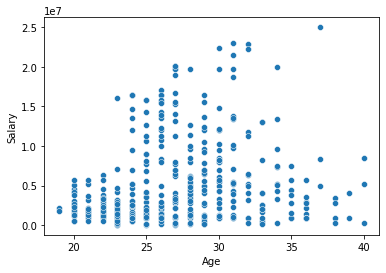

In [56]:
sns.scatterplot(x="Age", y="Salary", data = nba_dataset) #hue="Team"

<AxesSubplot:xlabel='Position', ylabel='Height_m'>

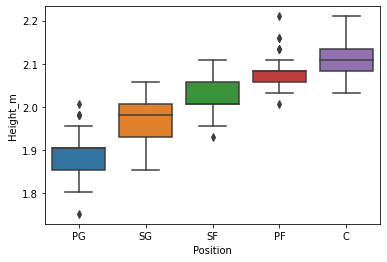

In [57]:
grouped = nba_dataset.loc[:,['Position', 'Height_m']] \
    .groupby(['Position']) \
    .median() \
    .sort_values(by='Height_m')

sns.boxplot(x="Position", y="Height_m", order=grouped.index, data = nba_dataset)

In [ ]:
# pd.crosstab(nba_dataset[['Team','Position']], columns='count').sort_values( by="count", ascending=False)

### Read from console

In [ ]:
import sys

file_name = sys.argv[1]
f = open(file_name)
nba_dataset = f.read()
f.close()